# Practice Descriptive Statistics and Data Manipulation with `R` 

In the `R` lab notebook for this module, we focused mainly on what descriptive statistics tell us and how to find them using `R`. In this practice notebook, we will go a step further and integrate the data manipulation techniques that you learned, as it is very important aspect of exploring your data.

We again are going to be using the *Game of Thrones* dataset that we used throughout the labs. We will begin by reading in the data.

In [1]:
library(dplyr)

# read in Game of Thrones data
file <- read.csv('/dsa/data/all_datasets/game-of-thrones/GoT_age_at_death.csv')


# a bit of column clean up
df <-file %>%
    rename(Dead = `Dead..1...dead.`, Gender = `Gender..1.male.`) %>%
    mutate(Dead = as.factor(Dead), Gender = as.factor(Gender), Affiliation = as.factor(Affiliation))

# show first few rows
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Character,Age,Dead,Gender,Affiliation
<fct>,<int>,<fct>,<fct>,<fct>
Sandor Clegan,29,1,1,4
Benjen Stark,35,1,1,10
Syrio Forel,41,1,1,1
Tysha,29,0,0,4
Jeyne Pool,12,1,0,1
Imry Florent,35,1,1,2


In the lab, we didn't introduce the `summary` function until later on in the notebook, however, it is often the best place to start.

In [2]:
summary(df$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    20.0    35.0    35.6    47.0   102.0 

The line of code above just runs the summary statitistics on the only numeric column in the entire dataset, but it isn't the only interesting variable. 

**Activity 1**: *Run a `summary` on the entire *Game of Thrones* data.*

In [3]:
# Activity 1 code goes here 
# -------------------------
summary(df)



               Character        Age        Dead    Gender   Affiliation 
 High Septon        :  2   Min.   :  0.0   0:176   0: 92   3      : 59  
 Lannister Guardsmen:  2   1st Qu.: 20.0   1:193   1:277   1      : 47  
 Rhaenys Targaryen  :  2   Median : 35.0                   2      : 42  
 Addam Marband      :  1   Mean   : 35.6                   4      : 38  
 Adrack Humble      :  1   3rd Qu.: 47.0                   10     : 33  
 Aegon Blackfyre    :  1   Max.   :102.0                   6      : 25  
 (Other)            :360                                   (Other):125  

We know the mean age of the entire dataset to be around 35.6 years old. But what if we were interested in a different subset of data? *Game of Thrones* kills off a lot of characters. What if our question became, what is the average age of the dead characters?

**Activity 2**: *Create a subset from the entire data frame to only include those individuals who are deceased. (Remember, "1" codes for dead in this dataset). Call this data frame, `dead_chars`.* 

In [14]:
# Activity 2 code goes here 
# -------------------------
dead_chars <- subset(df, Dead == 1)
head(dead_chars)


,Character,Age,Dead,Gender,Affiliation
,<fct>,<int>,<fct>,<fct>,<fct>
1,Sandor Clegan,29,1,1,4
2,Benjen Stark,35,1,1,10
3,Syrio Forel,41,1,1,1
5,Jeyne Pool,12,1,0,1
6,Imry Florent,35,1,1,2
7,Sorcerer in the Box,60,1,1,0


**Activity 3**: Now, find the mean age and standard deviation of those characters who have died.

In [15]:
# Activity 3 code goes here 
# -------------------------
print(mean(dead_chars$Age))
print(sd(dead_chars$Age))


[1] 37.96373
[1] 19.79041


This is nice, but we are only trying to explore our data a bit. It isn't necessary to create a whole new data frame for every little slice of data that we want to investigate.

**Activity 4**: *Could you use `dplyr` to find the mean age and standard deviation for those individuals in the data frame who are still alive?*

In [16]:
# Activity 4 code goes here 
# -------------------------
df %>% filter(Dead == 0) %>% summarize(meanage = mean(Age), sdage = sd(Age))



meanage,sdage
<dbl>,<dbl>
33.00568,17.82983


One thing that wasn't mentioned in the lab notebook was that comparing the mean and the median to one another gives you an idea about the symmetry of the dataset. **this was mentioned in module 1 practice but lets review**  When the mean is greater than the median, it means that the data is skewed to the right, and when the median is greater than the mean, the data is skewed to the left. When the mean and median are the same, it means that the data are symmetrical. In other words, in a right skewed distribution, most of the data points are below the mean, but there are some high value points pulling the mean higher; the opposite is true for a left skew.

<img src="../images/distr_sym.gif">

Let's return to the subset of those who are dead. 

**Activity 5**: *Does the age distribution for these deceased individuals have a right skew, left skew, or is it symmetrical?*



In [17]:
# Activity 5 code to determine answer goes here 
# ---------------------------------------------
median(dead_chars$Age)



[1] 36

### Univariate Visualizations

This is an appropriate time to visualize the distribution. Remember, we introduced two different types of plots that are useful for univariate visualization, the histogram and the boxplot. But what if we wanted to plot a visualziation depicting the number of males and females in the data set?

Below is an example of how to do that. Notice that we also call the `table()` fuction. What this does is count the number of rows per each unique value in a column and converts it to a table format.


  0   1 
 92 277 

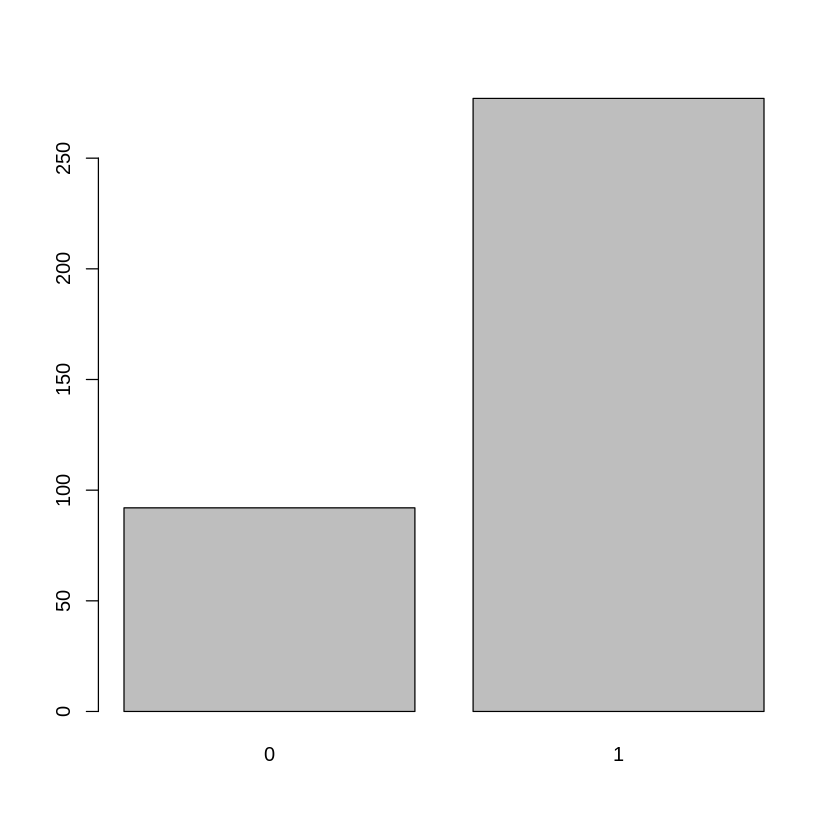

In [18]:
table(df$Gender) # show what the table function does
barplot(table(df$Gender)) # create a bar plot

We haven't discussed the `Affiliation` variable much, but essentially the characters can be grouped in the books/show based off of their loyalty to a family. 

**Activity 6**: *In the `dead` subset, create a bar plot to visualize all of the losses per affiliation.*

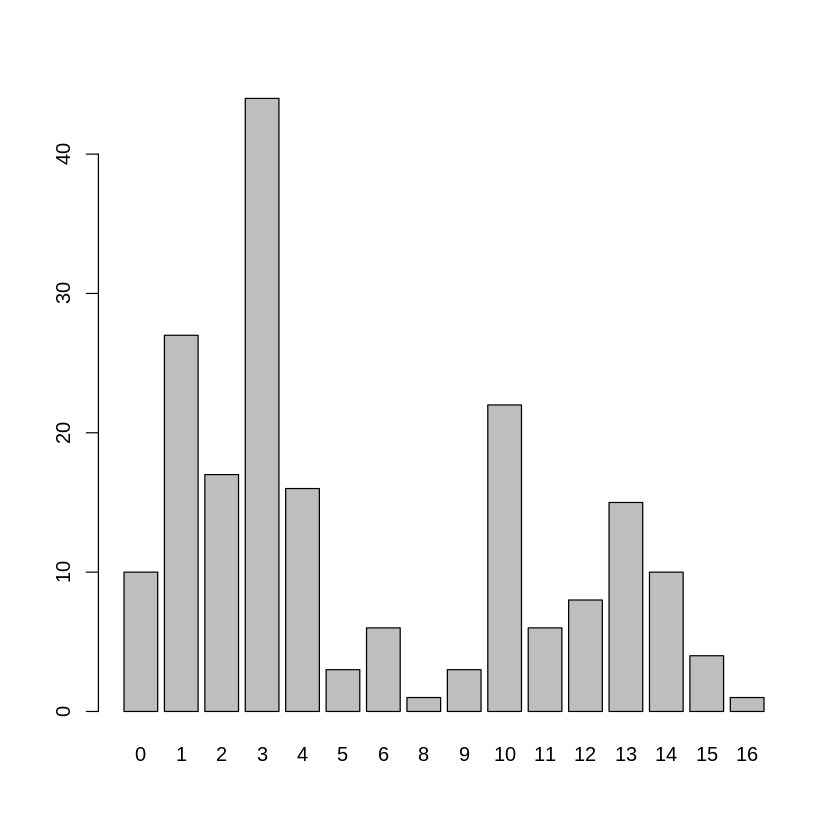

In [20]:
# Activity 6 code goes here 
# -------------------------
de <- table(dead_chars$Affiliation)
barplot(de)


**Challenge Activity 1**: *Using the mean as our average age, find the mean age of the deceased per affiliation. (You may want to use `dplyr`, but attempt it whatever way you see fit.)*

In [25]:
# Challenge Activity 1 code goes here 
# -----------------------------------

special <- df %>% group_by(Affiliation) %>% summarize(Mean_Age = mean(Age))
head(special)


Affiliation,Mean_Age
<fct>,<dbl>
0,32.18182
1,34.87234
2,33.02381
3,36.50847
4,39.26316
5,26.50000


## Bivariate Analysis

In the lab activity, we read in the *Stature Hand and Foot* dataset and found the covariance and correlation between the hand length and foot length. We are going to be using the same dataset this time around, but for different factor levels...

In [26]:
file2 <- read.csv("/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv")

df2 <- file2 %>%
    mutate(gender = as.factor(gender))

head(df2)

gender,height,hand.length,foot.length
<fct>,<dbl>,<dbl>,<dbl>
1,1760.2,208.6,269.6
1,1730.1,207.6,251.3
1,1659.6,173.2,193.6
1,1751.3,258.0,223.8
1,1780.6,212.3,282.1
1,1818.3,213.4,268.0


What we didn't mention in the lab is that you can actually create a covariance and correlation matrices so that you can quickly see how one variable influences the other. Below is an example of a covariance matrix. 

In [27]:
cov(df2[2:4])

,height,hand.length,foot.length
height,8819.668,1094.2472,1535.1564
hand.length,1094.247,178.0149,195.0701
foot.length,1535.156,195.0701,344.0532


Notice how we have to specify the columns. What would happen if we just put the data frame as the argument? You will notice that each variable is a row and a column. `height`'s covariance with `height` is the 1st row, 1st column. `height`'s covariance with `hand.length` is the 1st row, 2nd column, and `height`'s covariance with `foot.length` is the 1st row, 3rd column. This relationship can be applied to the other variables by going down the rows.

**Activity 7**: *Attempt to create a correlation matrix of df2. Why are the values 1 across the diagonal?*

In [30]:
# Activity 7 code goes here 
# -------------------------
cor(df2[2:4])
print("the matrix is symmetrical, 1 is when you're trying to find correlation betweet height and height for example")

,height,hand.length,foot.length
height,1.0000000,0.8732954,0.8812795
hand.length,0.8732954,1.0000000,0.7882243
foot.length,0.8812795,0.7882243,1.0000000


[1] "the matrix is symmetrical, 1 is when you're trying to find correlation betweet height and height for example"


**Activity 8**: *Now find the covariance and correlation between male hand length and foot length.*

In [31]:
# Activity 8 code goes here 
# -------------------------

males <- subset(df2, gender == 1)

cor(males$hand.length, males$foot.length)
cov(males$hand.length, males$foot.length)

[1] 0.4730002

[1] 54.10615

**Activity 9**: *Now find the covariance and correlation between female hand length and foot length.*

In [33]:
# Activity 9 code goes here 
# -------------------------
fem <- subset(df2, gender == 2 )
cor(fem$hand.length, fem$foot.length)
cov(fem$hand.length, fem$foot.length)

[1] 0.609538

[1] 68.93168

**Activity 10**: *Finally, create a scatter plot of these relationships. One for males and the other for females.*

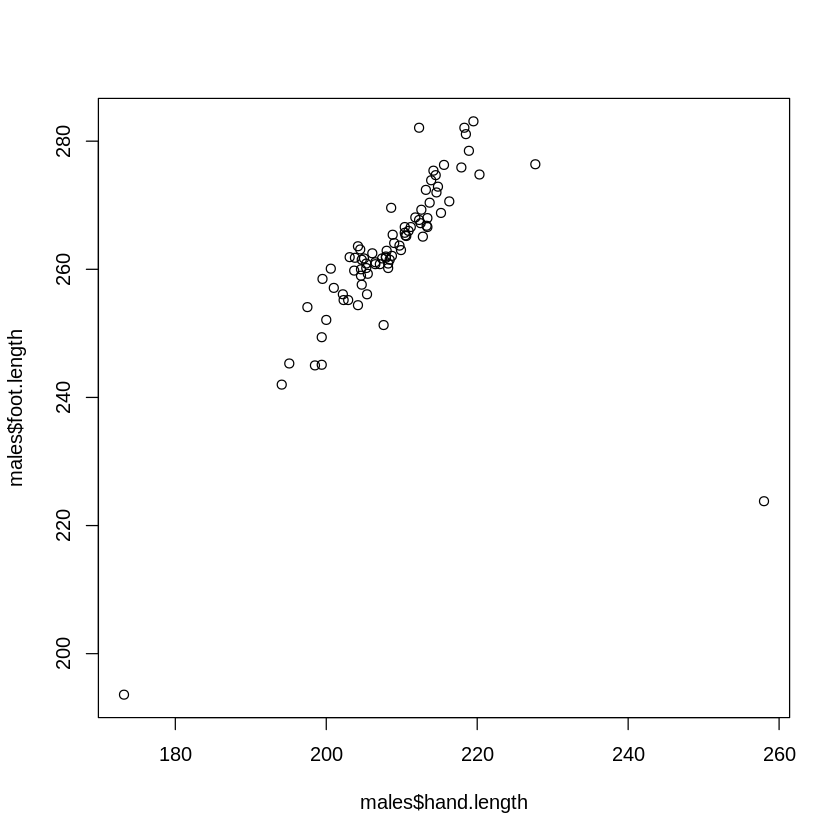

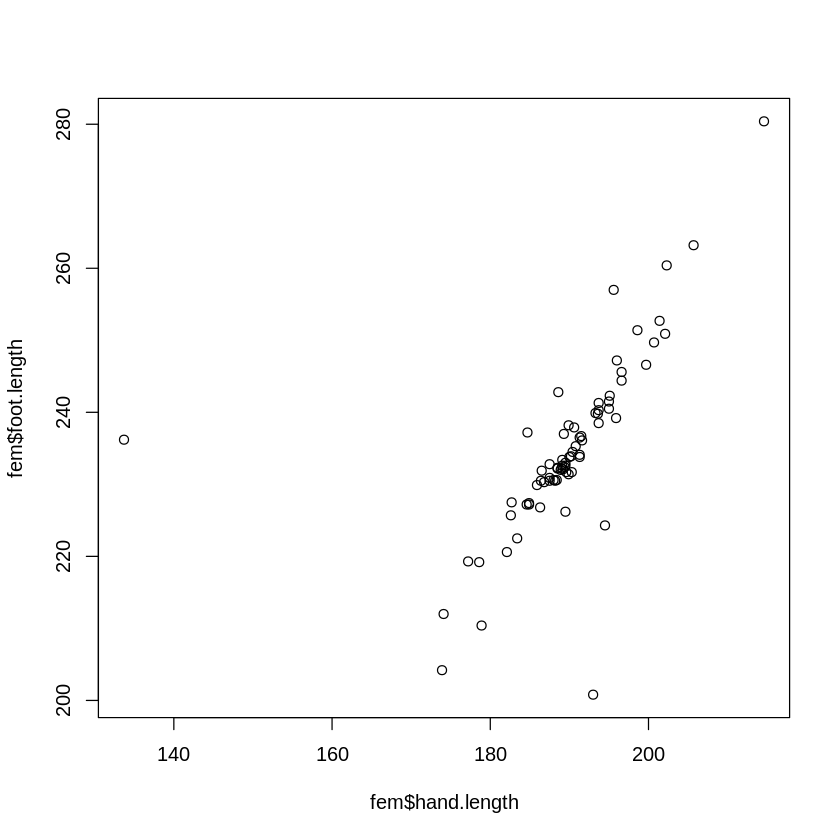

In [35]:
# Activity 10 code goes here 
# --------------------------
plot(males$hand.length, males$foot.length)
plot(fem$hand.length, fem$foot.length)


# Save your notebook, then `File > Close and Halt`